In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

covid19 = pd.read_csv('covid-19-all.csv')

In [25]:
covid19['Date'] = pd.to_datetime(covid19['Date'])
covid19['daymonthyear'] = covid19['Date'].dt.strftime('%d-%m-%Y')
covid19['day'] = covid19['Date'].dt.day
covid19['month'] = covid19['Date'].dt.month
covid19['daymonth'] = covid19['Date'].dt.strftime('%d-%m')

In [26]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101768 entries, 0 to 101767
Data columns (total 12 columns):
Country/Region    101768 non-null object
Province/State    93034 non-null object
Latitude          101767 non-null float64
Longitude         101767 non-null float64
Confirmed         101749 non-null float64
Recovered         101380 non-null float64
Deaths            101327 non-null float64
Date              101768 non-null datetime64[ns]
daymonthyear      101768 non-null object
day               101768 non-null int64
month             101768 non-null int64
daymonth          101768 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 9.3+ MB


In [27]:
hungary = covid19.loc[covid19['Country/Region'] == 'Hungary']
hungary.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date,daymonthyear,day,month,daymonth
3336,Hungary,NaN,47.1625,19.5033,2.0,0.0,0.0,2020-03-04,04-03-2020,4,3,04-03
3503,Hungary,NaN,47.1625,19.5033,2.0,0.0,0.0,2020-03-05,05-03-2020,5,3,05-03
3688,Hungary,NaN,47.1625,19.5033,2.0,0.0,0.0,2020-03-06,06-03-2020,6,3,06-03
3877,Hungary,NaN,47.1625,19.5033,4.0,0.0,0.0,2020-03-07,07-03-2020,7,3,07-03
4097,Hungary,NaN,47.1625,19.5033,7.0,0.0,0.0,2020-03-08,08-03-2020,8,3,08-03


([<matplotlib.axis.XTick at 0x105a3a88>,
 [Text(0, 0, '2020-03-04'),
  Text(0, 0, '2020-03-13'),
  Text(0, 0, '2020-03-22'),
  Text(0, 0, '2020-03-31'),
  Text(0, 0, '2020-04-9'),
  Text(0, 0, '2020-04-18')])

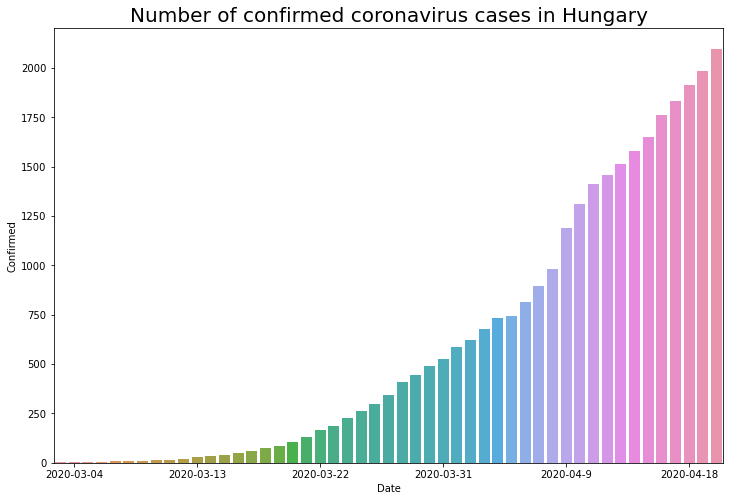

In [28]:
# Plot of infections in Hungary

plt.figure(figsize = (12,8))
sns.barplot(hungary['Date'], hungary['Confirmed'])
plt.title('Number of confirmed coronavirus cases in Hungary', fontsize = 20)
plt.xticks(np.arange(1,50,9), ['2020-03-04','2020-03-13', '2020-03-22','2020-03-31', '2020-04-9','2020-04-18'])
#plt.savefig('hun_cases.jpg')

([<matplotlib.axis.XTick at 0x1162b588>,
 [Text(0, 0, '2020-03-04'),
  Text(0, 0, '2020-03-13'),
  Text(0, 0, '2020-03-22'),
  Text(0, 0, '2020-03-31'),
  Text(0, 0, '2020-04-9'),
  Text(0, 0, '2020-04-18')])

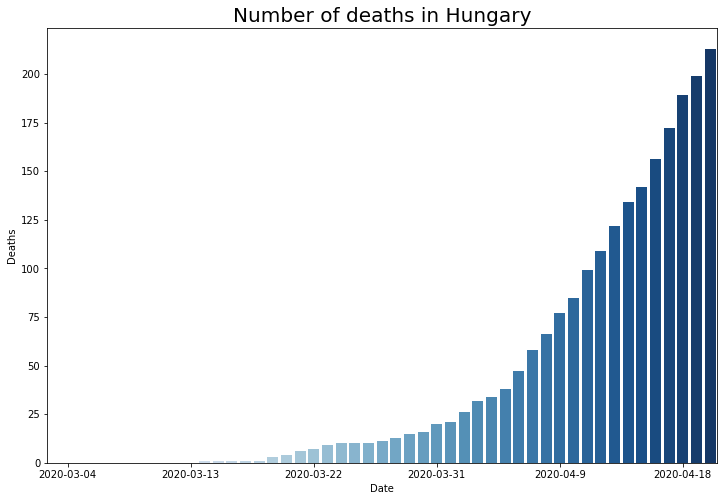

In [29]:
# Plot of death cases in Hungary

plt.figure(figsize = (12,8))
sns.barplot(hungary['Date'], hungary['Deaths'], palette = 'Blues')
plt.title('Number of deaths in Hungary', fontsize = 20)
plt.xticks(np.arange(1,50,9), ['2020-03-04','2020-03-13', '2020-03-22','2020-03-31', '2020-04-9','2020-04-18'])

([<matplotlib.axis.XTick at 0x1162b888>,
 [Text(0, 0, '2020-03-04'),
  Text(0, 0, '2020-03-13'),
  Text(0, 0, '2020-03-22'),
  Text(0, 0, '2020-03-31'),
  Text(0, 0, '2020-04-9'),
  Text(0, 0, '2020-04-18')])

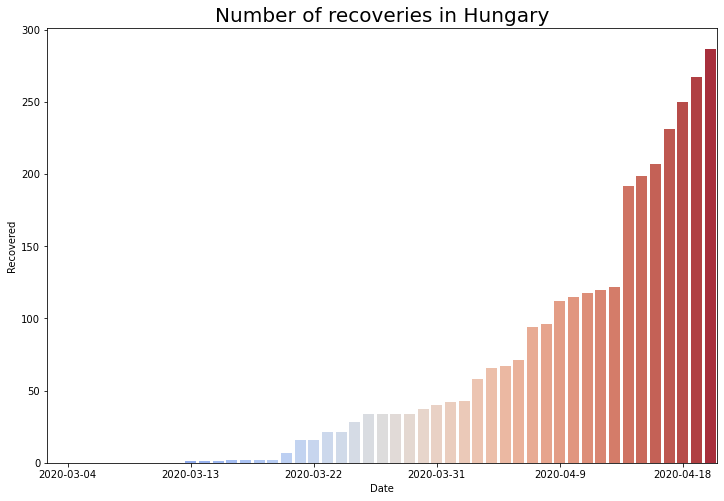

In [30]:
# Plot of recovered cases in Hngary

plt.figure(figsize = (12,8))
sns.barplot(hungary['Date'], hungary['Recovered'], palette = 'coolwarm')
plt.title('Number of recoveries in Hungary', fontsize = 20)
plt.xticks(np.arange(1,50,9), ['2020-03-04','2020-03-13', '2020-03-22','2020-03-31', '2020-04-9','2020-04-18'])

In [31]:
# Creating a polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [32]:
hungary['Num'] = np.arange(1,50)
hungary.tail()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date,daymonthyear,day,month,daymonth,Num
89355,Hungary,NaN,47.1625,19.5033,1763.0,207.0,156.0,2020-04-17,17-04-2020,17,4,17-04,45
92408,Hungary,NaN,47.1625,19.5033,1834.0,231.0,172.0,2020-04-18,18-04-2020,18,4,18-04,46
95480,Hungary,NaN,47.1625,19.5033,1916.0,250.0,189.0,2020-04-19,19-04-2020,19,4,19-04,47
98561,Hungary,NaN,47.1625,19.5033,1984.0,267.0,199.0,2020-04-20,20-04-2020,20,4,20-04,48
101660,Hungary,NaN,47.1625,19.5033,2098.0,287.0,213.0,2020-04-21,21-04-2020,21,4,21-04,49


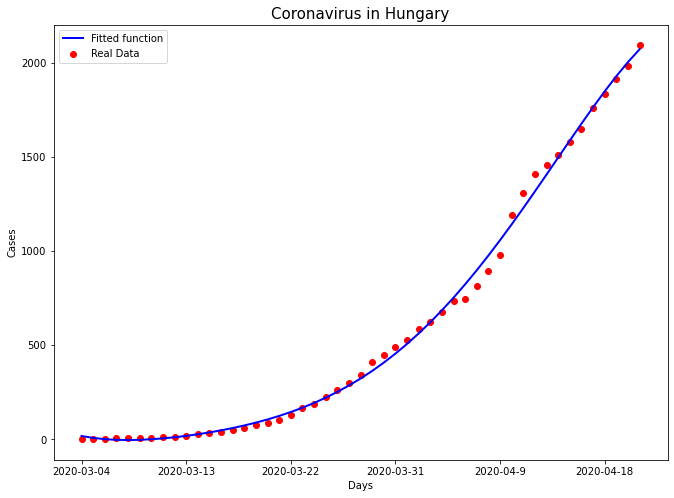

In [33]:
X = hungary.iloc[:,12:13]
y = hungary['Confirmed']
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X)
poly = LinearRegression()
poly.fit(X_poly, y)
prediction = poly.predict(X_poly)

plt.figure(figsize=(11,8))
plt.scatter(X, y, color = 'red', label = 'Real Data')
plt.plot(X, prediction, color = 'blue', linewidth = 2, label = 'Fitted function')
plt.title('Coronavirus in Hungary', fontsize = 15)
plt.xlabel('Days')
plt.ylabel('Cases')
plt.xticks(np.arange(1,50,9),['2020-03-04','2020-03-13', '2020-03-22','2020-03-31', '2020-04-9','2020-04-18'])
plt.legend()
plt.show()